In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [54]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='training loss')
  plt.plot(history.history['val_loss'], label='testing loss')
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend()

def plot_variance(test_predictions, test_labels):
  a = plt.axes(aspect='equal')
  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values [Score]')
  plt.ylabel('Predictions [Score]')
  lims = [0, 50]
  plt.xlim(lims)
  plt.ylim(lims)
  _ = plt.plot(lims, lims)

In [2]:
print(tf.__version__)

2.8.2


In [5]:
df = pd.read_csv('/all_pref_data_score.csv')

In [6]:
df

,preference_score,cg_gender,cg_smoking,cg_pets_2,cg_alzheimers,cg_dementia,cg_incontinent_care,cg_hoyer_lift,cg_bed_bath,cg_stand_by_assist,...,cl_personality,cl_quad_care,cl_live_in_assistance,cl_meal_preparation,cl_cg_skills,cl_cg_certifications,cl_work_with_child,cl_chronic_diseases,cl_hospice_care,cl_adaptive_equipments
0,50,2,0,8191,0,0,1,-1,0,1,...,0,1,1,1,0,0,-1,32,1,32768
1,71,2,-1,-1,0,0,0,-1,0,0,...,0,1,1,0,7,0,1,32,1,32768
2,81,2,1,8191,0,0,0,-1,0,0,...,2,1,1,1,7,0,1,5,1,16
3,81,2,1,8191,0,0,0,-1,0,0,...,2,1,1,1,7,0,1,5,1,16
4,59,2,-1,-1,0,0,0,-1,0,0,...,2,1,1,1,7,0,1,5,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35888,0,2,1,8191,0,0,0,-1,0,0,...,-1,-1,-1,-1,0,0,-1,-1,-1,-1
35889,0,2,1,8191,0,0,0,-1,0,0,...,-1,-1,-1,-1,0,0,-1,-1,-1,-1
35890,0,2,1,8191,0,0,0,-1,0,0,...,-1,-1,-1,-1,0,0,-1,-1,-1,-1
35891,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,0,0,-1,-1,-1,-1


In [7]:
len(df[df["preference_score"]==0])

20425

In [8]:
len(df[df["preference_score"]!=0])

15468

In [25]:
df2 = df[df["preference_score"]!=0]
# take 20% of the zeros randomly
df2 = df2.append(df[df["preference_score"]==0].sample(frac = 0.2))
df2.reset_index(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19553 entries, 0 to 19552
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   index                     19553 non-null  int64
 1   preference_score          19553 non-null  int64
 2   cg_gender                 19553 non-null  int64
 3   cg_smoking                19553 non-null  int64
 4   cg_pets_2                 19553 non-null  int64
 5   cg_alzheimers             19553 non-null  int64
 6   cg_dementia               19553 non-null  int64
 7   cg_incontinent_care       19553 non-null  int64
 8   cg_hoyer_lift             19553 non-null  int64
 9   cg_bed_bath               19553 non-null  int64
 10  cg_stand_by_assist        19553 non-null  int64
 11  cg_slide_board            19553 non-null  int64
 12  cg_strong_transfer        19553 non-null  int64
 13  cg_language               19553 non-null  int64
 14  cg_transportation         19553 non-nu

In [26]:
df2.isna().sum()

index                       0
preference_score            0
cg_gender                   0
cg_smoking                  0
cg_pets_2                   0
cg_alzheimers               0
cg_dementia                 0
cg_incontinent_care         0
cg_hoyer_lift               0
cg_bed_bath                 0
cg_stand_by_assist          0
cg_slide_board              0
cg_strong_transfer          0
cg_language                 0
cg_transportation           0
cg_age                      0
cg_work_with_smokers        0
cg_personality              0
cg_quad_care                0
cg_live_in_assistance       0
cg_meal_preparation         0
cg_cg_skills                0
cg_cg_certifications        0
cg_work_with_child          0
cg_chronic_diseases         0
cg_hospice_care             0
cg_adaptive_equipments      0
cg_cg_own_transportation    0
cl_gender                   0
cl_smoking                  0
cl_pets                     0
cl_alzheimers               0
cl_dementia                 0
cl_inconti

In [27]:
#dropna
df2 = df2.dropna()

In [28]:
df2.shape

(19553, 53)

In [29]:
#train/test split
df2 = df2.sample(frac=1).reset_index()
train = df2.sample(frac=0.8, random_state=0)
test = df2.drop(train.index)

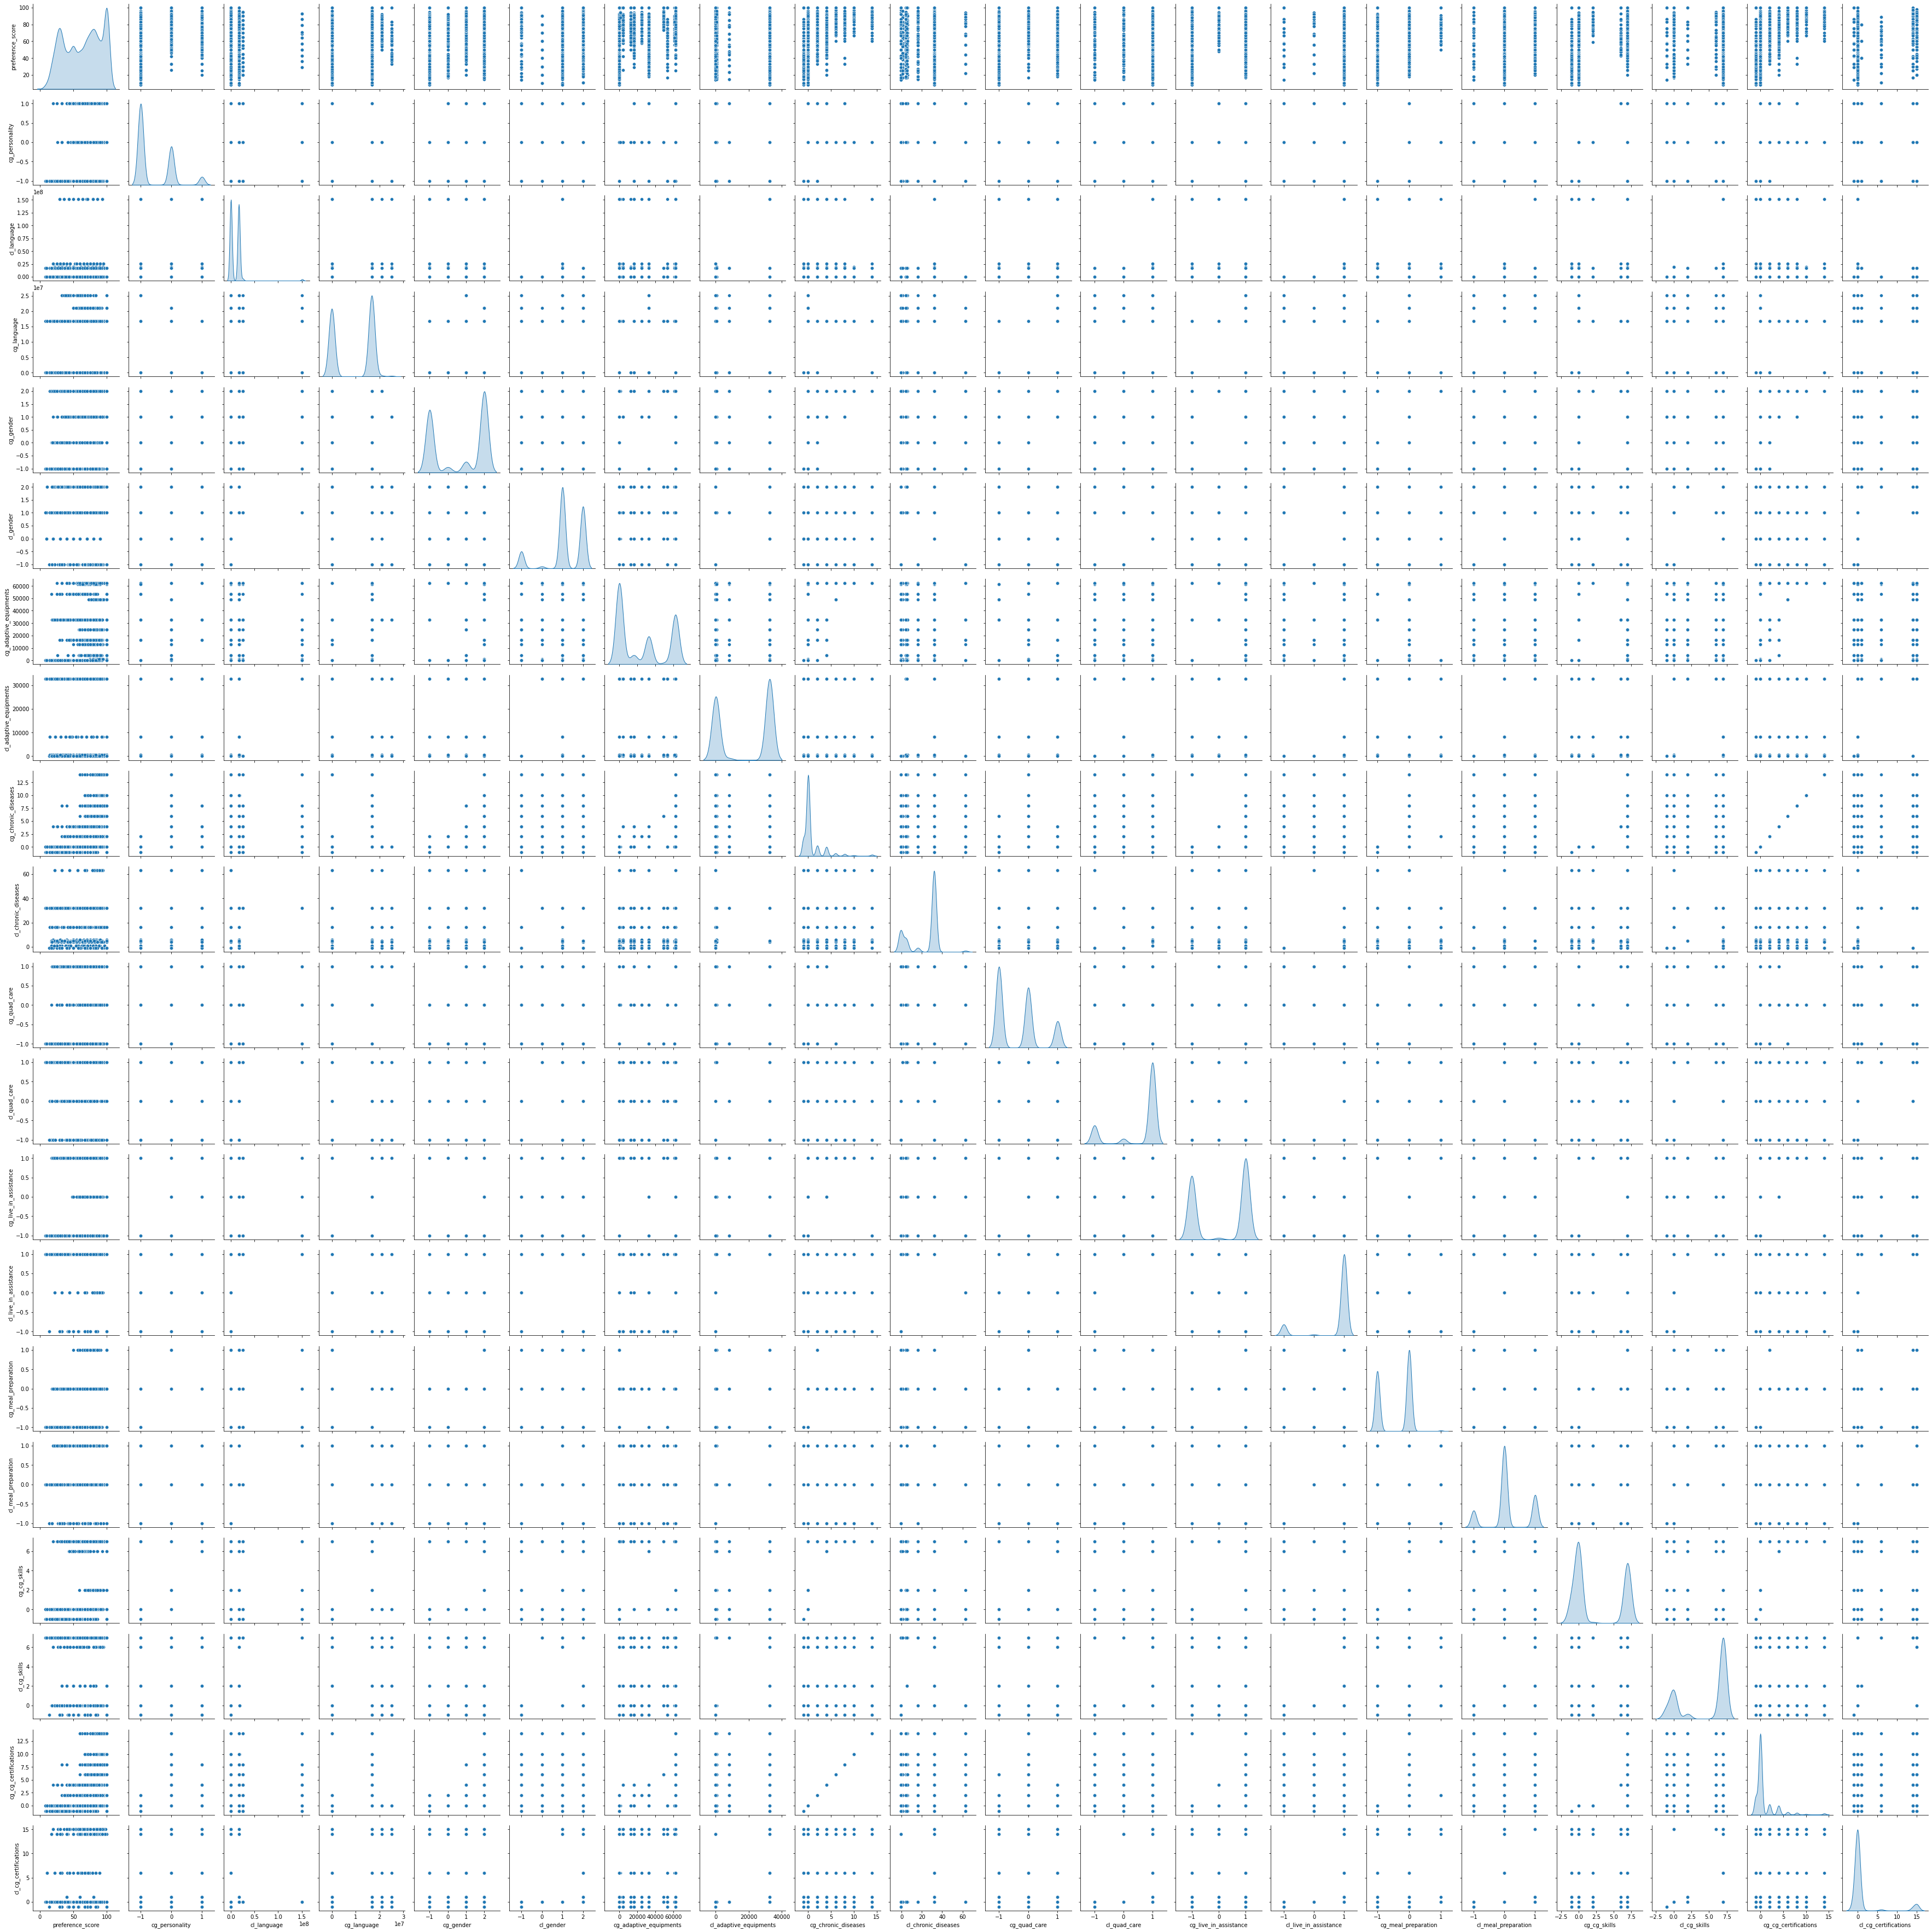

In [20]:
sns.pairplot(train[['preference_score', 
                    'cg_personality', 'cl_language', 'cg_language', 'cg_gender', 'cl_gender',
                    'cg_adaptive_equipments', 'cl_adaptive_equipments', 'cg_chronic_diseases', 'cl_chronic_diseases',
                    'cg_quad_care', 'cl_quad_care', 'cg_live_in_assistance', 'cl_live_in_assistance', 
                    'cg_meal_preparation', 'cl_meal_preparation', 'cg_cg_skills','cl_cg_skills', 'cg_cg_certifications','cl_cg_certifications'
            ]], diag_kind='kde')

In [30]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
level_0,15642.0,9.744587e+03,5.652373e+03,0.0,4837.25,9707.5,14648.75,19551.0
index,15642.0,1.828992e+04,1.045925e+04,0.0,9142.25,18636.5,27236.75,35890.0
preference_score,15642.0,5.027618e+01,3.540118e+01,0.0,20.00,50.0,82.00,100.0
cg_gender,15642.0,7.041938e-01,1.417878e+00,-1.0,-1.00,2.0,2.00,2.0
cg_smoking,15642.0,-2.959980e-02,9.570835e-01,-1.0,-1.00,0.0,1.00,1.0
cg_pets_2,15642.0,3.422168e+03,3.773655e+03,-1.0,-1.00,-1.0,8191.00,8191.0
cg_alzheimers,15642.0,-3.955377e-01,5.915787e-01,-1.0,-1.00,0.0,0.00,1.0
cg_dementia,15642.0,-4.131185e-01,5.745062e-01,-1.0,-1.00,0.0,0.00,1.0
cg_incontinent_care,15642.0,-3.363381e-01,6.910576e-01,-1.0,-1.00,0.0,0.00,1.0
cg_hoyer_lift,15642.0,-1.000000e+00,0.000000e+00,-1.0,-1.00,-1.0,-1.00,-1.0


In [31]:
#features and label split
train_features = train.copy()
test_features = test.copy()

train_labels = train.pop('preference_score')
test_labels = test.pop('preference_score')

In [32]:
train.describe().transpose()[['mean', 'std']]

,mean,std
level_0,9.744587e+03,5.652373e+03
index,1.828992e+04,1.045925e+04
cg_gender,7.041938e-01,1.417878e+00
cg_smoking,-2.959980e-02,9.570835e-01
cg_pets_2,3.422168e+03,3.773655e+03
cg_alzheimers,-3.955377e-01,5.915787e-01
cg_dementia,-4.131185e-01,5.745062e-01
cg_incontinent_care,-3.363381e-01,6.910576e-01
cg_hoyer_lift,-1.000000e+00,0.000000e+00
cg_bed_bath,-4.101777e-01,5.781599e-01


In [33]:
# Normalize the train set
## Create Normalizing layer
normalizer = tf.keras.layers.Normalization(axis=-1)
## Fit the state of the preprocessing layer to the data by calling Normalization.adapt
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[ 9.74458789e+03  1.82899199e+04  5.02761765e+01  7.04193890e-01
  -2.95998044e-02  3.42216821e+03 -3.95537764e-01 -4.13118511e-01
  -3.36338073e-01 -1.00000000e+00 -4.10177857e-01 -3.69134396e-01
  -1.00000000e+00 -2.66909868e-01  9.38081800e+06  4.43012476e+00
  -1.38856828e-01 -1.87252238e-01 -5.75310230e-01 -3.16263974e-01
   1.30162343e-01 -4.13757920e-01  2.49181724e+00  7.83403456e-01
  -3.72713983e-01  7.83403456e-01 -2.68763363e-01  2.51805625e+04
  -3.14921379e-01  7.36222863e-01  2.49584407e-01  2.34942090e+03
   2.26313800e-01  1.84950739e-01  1.73251461e-02 -1.00000000e+00
  -9.65989232e-02 -7.20495954e-02 -1.00000000e+00  2.19537154e-01
   7.86637850e+06 -6.22682460e-02  5.13329363e+00 -1.46720320e-01
   4.47513074e-01  2.86216587e-01  4.05383140e-01 -1.00626506e-01
   3.69517994e+00  9.76474106e-01  2.88198411e-01  1.82791882e+01
   3.31543326e-01  1.47851230e+04]]


In [34]:
#how that works? When the layer is called, it returns the input data, with each feature independently normalized
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[17414 33020     0    -1     1  4096    -1    -1    -1    -1    -1     0
     -1     1    32     8     0     0    -1    -1     1    -1     0     0
     -1     0    -1 32768     1    -1    -1    -1    -1    -1    -1    -1
     -1    -1    -1    -1     0     0    -1    -1    -1    -1    -1    -1
      0     0    -1    -1    -1    -1]]

Normalized: [[ 1.36  1.41 -1.42 -1.2   1.08  0.18 -1.02 -1.02 -0.96  0.   -1.02  0.58
   0.    1.67 -1.11  0.64  0.4   0.26 -0.7  -0.93  0.88 -1.17 -0.71 -0.33
  -1.07 -0.33 -0.96  0.28  2.23 -1.48 -1.44 -1.22 -1.36 -1.31 -1.22  0.
  -1.23 -1.22  0.   -1.31 -0.51  0.26 -1.41 -1.25 -1.12 -1.37 -1.54 -1.28
  -1.05 -0.26 -1.35 -1.2  -1.42 -0.91]]


In [39]:
#next create a ANN with first normalizer layer and then the Dense Layer
model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=27,activation='relu'),
    layers.Dense(units=1)
])

In [40]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 54)               109       
 n)                                                              
                                                                 
 dense_2 (Dense)             (None, 27)                1485      
                                                                 
 dense_3 (Dense)             (None, 1)                 28        
                                                                 
Total params: 1,622
Trainable params: 1,513
Non-trainable params: 109
_________________________________________________________________
None


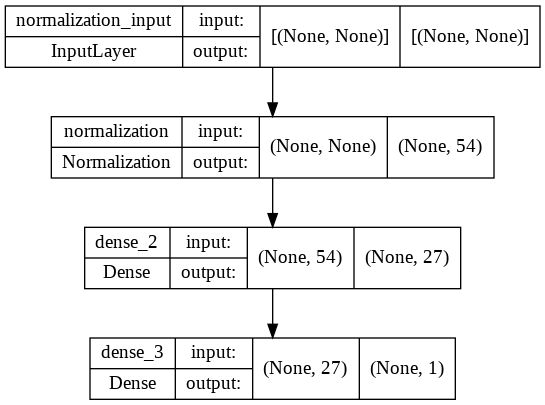

In [45]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [41]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [42]:
%%time
history = model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 51.7 s, sys: 4.54 s, total: 56.2 s
Wall time: 1min 22s


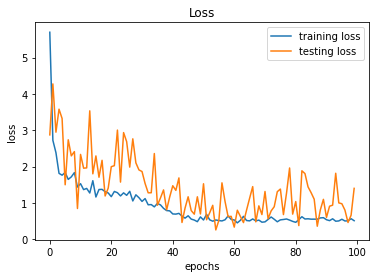

In [49]:
plot_loss(history)

In [50]:
test_results = model.evaluate(test_features, test_labels, verbose=0)

In [52]:
print("mean_absolute_error=",test_results)

mean_absolute_error= 1.4170348644256592


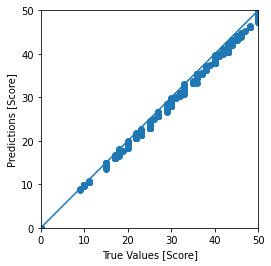

In [55]:
#Predict
test_predictions = model.predict(test_features).flatten()
#plot variance from True value
plot_variance(test_predictions, test_labels)